In [22]:
import pandas as pd
import numpy as np
   
tourney_df = pd.read_csv("data/tourneydata.csv", index_col=0)
tourney_df.columns[12]

'SEL0'

In [15]:
tourney_df = tourney_df.fillna(-1000)

# Choosing Features to Use for Model

Edit featureList below to use any of the features in the data frame above (see above for names of columns).  

In [31]:
systems = ['SAG', 'MOR', 'BOB', 'WOL', 'WLK', 'POM', 'DOL', 'COL', 'RTH', 'RPI']

teamfList = []
#teamfList = systems
#teamfList = ['efg', 'to_p', 'orp', 'ftr']
#teamfList.append('wins')
#featureList = []
#for f in teamfList:
#    featureList.append(f+'0')
#    featureList.append(f+'1')
featureList = tourney_df.columns[12:]

#for s in systems:
#    featureList.append('d'+s+'_rating')
#for f in ['fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']:
#    for mod in ['avg_', 'std_']:
#        featureList.append(mod+f+'0')
#        featureList.append(mod+f+'1')
print("Feature list = {0}".format(featureList))

Feature list = Index(['SEL0', 'AP0', 'BIH0', 'DUN0', 'ENT0', 'GRN0', 'IMS0', 'MAS0', 'MKV0',
       'MOR0',
       ...
       'STF1', 'WMR1', 'PPR1', 'MPI1', 'STS1', 'UPS1', 'SPR1', 'MvG1', 'TRK1',
       'BWE1'],
      dtype='object', length=264)


In [32]:
oldfeatureList = featureList
featureList = []
for feature in oldfeatureList:
    Nnans = tourney_df[feature].isnull().sum()
    if Nnans == 0:
        featureList.append(feature)

SEL0 128
AP0 393
BIH0 64
DUN0 195
ENT0 655
GRN0 335
IMS0 719
MAS0 256
MKV0 655
MOR0 0
POM0 0
RPI0 0
SAG0 0
SAU0 655
SE0 128
STR0 655
USA0 394
WLK0 0
WOB0 64
BOB0 0
DWH0 527
ERD0 783
ECK0 527
BRZ0 783
ARG0 655
RTH0 0
WOL0 0
HOL0 783
COL0 0
DOL0 0
GC0 847
GRS0 652
HER0 655
TSR0 527
MIC0 847
WTE0 783
BD0 719
MGY0 783
RAG0 847
CNG0 64
SIM0 463
DES0 508
JON0 783
LYN0 273
NOR0 783
RM0 783
REI0 783
ACU0 636
BCM0 783
CMV0 783
SAP0 655
DC0 128
KLK0 527
WIL0 192
ROH0 655
RIS0 783
REN0 655
SCR0 591
DOK0 192
PIG0 192
KPK0 384
PKL0 719
TRX0 725
MB0 326
JCI0 719
PH0 783
LYD0 719
KRA0 320
RTR0 256
UCS0 783
ISR0 591
CPR0 256
BKM0 783
JEN0 521
REW0 320
STH0 320
SPW0 320
RSE0 783
PGH0 320
CPA0 320
RTB0 451
TOL0 847
HKB0 585
BPI0 518
TW0 515
NOL0 384
DC20 652
DCI0 384
OMY0 582
EBB0 847
LMC0 384
RT0 448
KEL0 783
KMV0 716
RTP0 512
TMR0 512
AUS0 780
ROG0 713
BP50 847
PTS0 646
KOS0 646
PEQ0 780
ADE0 579
BNM0 780
CJB0 646
BUR0 646
HAT0 780
MSX0 579
BBT0 579
7OT0 579
SFX0 579
EBP0 579
TBD0 780
CRO0 579
D1A0 69

In [33]:
print(featureList)

['MOR0', 'POM0', 'RPI0', 'SAG0', 'WLK0', 'BOB0', 'RTH0', 'WOL0', 'COL0', 'DOL0', 'MOR1', 'POM1', 'RPI1', 'SAG1', 'WLK1', 'BOB1', 'RTH1', 'WOL1', 'COL1', 'DOL1']


In [34]:
y = tourney_df['team0Win'].values # results
X = tourney_df[featureList].values # features

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2721)

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print("Means = {0}, Stdevs = {1}".format(scaler.mean_, scaler.scale_))

Means = [ 41.20236337  39.92466765  35.62776957  39.35302806  37.0620384
  38.72378139  41.16691285  37.38700148  36.98522895  38.16543575
  40.96454948  39.06942393  34.6957164   38.1506647   35.9379616
  37.6070901   39.70753323  35.55982275  35.6070901   36.19793205], Stdevs = [ 50.35309997  48.2889377   40.42854261  48.26013683  44.50617593
  46.97416473  51.21787301  44.08010376  43.68576276  46.09622379
  48.82345656  47.51654827  38.49029338  46.79302666  42.37041055
  44.71220107  49.25417289  41.48062542  40.77070454  42.95171754]


In [37]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train our model!

In [38]:
print(X_train.shape)

(677, 20)


In [10]:
setsize=200.
X_train_sample, X_discard, y_train_sample, y_discard = train_test_split(X_train, y_train, test_size=1.-setsize/X_train.shape[0], random_state=2721)

In [43]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

Npts = 10
train_sizes = np.linspace(50,X_train.shape[0], Npts)
#svm_scores = np.zeros(Npts)
rf_scores = np.zeros(Npts)

for i, size in enumerate(train_sizes):
    X_train_sample, X_discard, y_train_sample, y_discard = train_test_split(X_train, y_train, test_size=1.-size/X_train.shape[0], random_state=2721)
    
    ################# SVM On Sample #################### 
    #C_range_s = np.logspace(-3, 3, 7)
    #gamma_range_s = np.logspace(-3, 3, 7)
    #param_grid_s = dict(gamma=gamma_range_s, C=C_range_s)
    cv_s = StratifiedShuffleSplit(y_train_sample,  n_iter=10 , test_size=0.1, random_state=42)
    #grid_s = GridSearchCV(svm.SVC(probability=True, kernel='rbf'), scoring="log_loss", param_grid=param_grid_s, cv=cv_s, n_jobs=-1)
    #grid_s.fit(X_train_sample, y_train_sample)
    #svm_scores[i] = grid_s.best_score_
    
    ######### Random Forest ###############################
    rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=50, oob_score = True) 
    param_grid = { 
        'n_estimators': [5, 10,50,100,500],
        'max_features': ['auto','sqrt','log2']
    # Other parameters: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html        
    }
    CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, scoring="log_loss", param_grid=param_grid, cv=cv_s)
    CV_rfc.fit(X_train_sample, y_train_sample)
    rf_scores[i] = CV_rfc.best_score_

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were us

In [44]:
print(svm_scores)
print(rf_scores)

[-0.60515932 -0.56250507 -0.55195268 -0.51419374 -0.53422776 -0.49726684
 -0.48922757 -0.52723612 -0.52834764 -0.53876347]
[-0.66199697 -0.53988946 -0.59224195 -0.58445281 -0.63053614 -0.57218833
 -0.50088513 -0.55382519 -0.54745058 -0.55412696]


TypeError: __init__() got an unexpected keyword argument 'location'

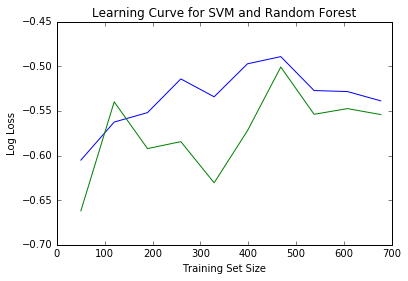

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train_sizes, svm_scores, label='SVM')
ax.plot(train_sizes, rf_scores, label='RF')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('Log Loss')
ax.set_title('Learning Curve for SVM and Random Forest')
ax.legend(location='best')

In [32]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve


################# Training on sample set #################
# setsize = 676 max (origin at 0): Number of training examples to train on (only parameter)
# Note to self : X_train.shape (677, 18)
setsize=50.
X_train_sample, X_discard, y_train_sample, y_discard = train_test_split(X_train, y_train, test_size=1.-setsize/X_train.shape[0], random_state=2721)#y_train_sample=np.ndarray(setsize, dtype=np.int)
#X_train_sample=np.ndarray((setsize,18))
#for ind in range(0, setsize):
#    y_train_sample[ind]=y_train[ind]
#    X_train_sample[ind,]=X_train[ind,]
    
    
    
################# SVM On Sample #################### 
C_range_s = np.logspace(-3, 3, 7)
gamma_range_s = np.logspace(-3, 3, 7)
param_grid_s = dict(gamma=gamma_range_s, C=C_range_s)
cv_s = StratifiedShuffleSplit(y_train_sample,  n_iter=10 , test_size=0.1, random_state=42)
grid_s = GridSearchCV(svm.SVC(probability=True, kernel='rbf'), scoring="log_loss", param_grid=param_grid_s, cv=cv_s, n_jobs=-1)
grid_s.fit(X_train_sample, y_train_sample)



################# SVM (Dan) ####################
#C_range = np.logspace(-3, 3, 7)
#gamma_range = np.logspace(-3, 3, 7)
#param_grid = dict(gamma=gamma_range, C=C_range)
#cv = StratifiedShuffleSplit(y_train, n_iter=10, test_size=0.1, random_state=42)
#grid = GridSearchCV(svm.SVC(probability=True, kernel='rbf'), scoring="log_loss", param_grid=param_grid, cv=cv, n_jobs=-1)
#grid.fit(X_train, y_train)




######### Random Forest ###############################
#rf1=RandomForestClassifier(n_estimators=10)
#rf1=rf1.fit(X_train, y_train)
#scorerf1=rf1.predict(X)
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=50, oob_score = True) 
param_grid = { 
    'n_estimators': [5, 10,50,100,500],
    'max_features': ['auto','sqrt','log2']
# Other parameters: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html        
}
CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, scoring="log_loss", param_grid=param_grid, cv=cv_s)
CV_rfc.fit(X_train_sample, y_train_sample)


print 

print "Full set: best parameters are %s with a score of %0.4f" % (grid.best_params_, grid.best_score_) 
print "Sample: best parameters are %s with a score of %0.4f" % (grid_s.best_params_, grid_s.best_score_) 
print "Random Forest: ", CV_rfc.best_params_ , CV_rfc.best_score_


/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/dtamayo/miniconda2/envs/ml2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees wer


Full set: best parameters are {'C': 0.10000000000000001, 'gamma': 0.001} with a score of -0.5850
Sample: best parameters are {'C': 1.0, 'gamma': 0.001} with a score of -0.6410
Random Forest:  {'max_features': 'log2', 'n_estimators': 100} -0.57796976568


In [ ]:
model = grid.best_estimator_
y_pred = model.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
print("Log loss is {0}".format(metrics.log_loss(y_test, y_pred)))

In [19]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
#C_range = np.logspace(0, 3, 4)
#gamma_range = np.logspace(-3,0,4)
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = svm.SVC(probability=True, kernel='rbf',C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

ValueError: X.shape[1] = 2 should be equal to 18, the number of features at training time

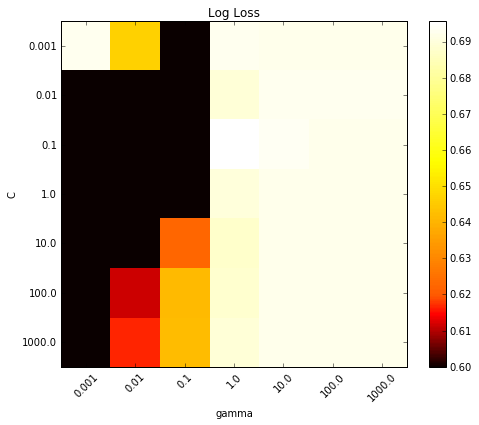

In [23]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

    
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
# We extract just the scores
scores = np.fabs([x[1] for x in grid.grid_scores_])
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.6, midpoint=0.62))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Log Loss')
plt.show()

In [22]:
def write_submission_file(model, featureList, scaler, submission_output_file): # see submission.ipynb for details
    import pandas as pd
    sample_df = pd.read_csv('data/SampleSubmissionWithFeatures.csv', index_col=0)
    Xsample = sample_df[featureList].values
    Xsample = scaler.transform(Xsample)
    sample_df['Pred'] = model.predict_proba(Xsample)[:,1] # predict_proba returns [prob label is 0, prob label is 1], kaggle wants 2nd column
    submission = sample_df[['Id', 'Pred']]
    submission.to_csv(submission_output_file, encoding='ascii', index=False)
submission_output_file = "data/submission.csv"
write_submission_file(model, featureList, scaler, submission_output_file)

In [21]:
submission_df = pd.read_csv(submission_output_file, index_col=0)
submission_df.head()

NameError: name 'submission_output_file' is not defined